# Percolation on a square grid - Monte Carlo simulation
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
**Percolation**

In [2]:
def generate_damage_grid(height, width, probability):
    return np.random.choice([True, False], p=[probability, 1 - probability], size=(height, width))

In [3]:
def find_route_to_bottom(damage_grid, fulfillment_grid, row, col):
    if row == damage_grid.shape[0] - 1:
        return True

    fulfillment_grid[row][col] = True

    for next_row, next_col in [(row - 1, col), (row, col - 1), (row, col + 1), (row + 1, col)]:
        if (next_row >= 0) and (next_col >= 0) and (next_col < damage_grid.shape[1]):
            if (damage_grid[next_row][next_col]) and (not fulfillment_grid[next_row][next_col]):
                if find_route_to_bottom(damage_grid, fulfillment_grid, next_row, next_col):
                    return True

    return False

In [4]:
def check_if_percolating(damage_grid):
    fulfillment_grid = np.full_like(damage_grid, False)

    for col in range(damage_grid.shape[1]):
        if (damage_grid[0][col]) and (not fulfillment_grid[0][col]):
            if find_route_to_bottom(damage_grid, fulfillment_grid, 0, col):
                return True

    return False

---
**Monte Carlo simulation**

In [5]:
GRID_HEIGHT = 16
GRID_WIDTH = 16

TRIALS_NUMBER = 1000

In [6]:
probability_list = np.linspace(0.1, 0.9, 17)
percolating_percentage_list = []

for damage_probability in probability_list:
    percolating_counter = 0

    for trial in range(TRIALS_NUMBER):
        damage_grid = generate_damage_grid(GRID_HEIGHT, GRID_WIDTH, damage_probability)

        if check_if_percolating(damage_grid):
            percolating_counter += 1

    percolating_percentage_list.append(100.0 * percolating_counter / TRIALS_NUMBER)

---
**Visualization**

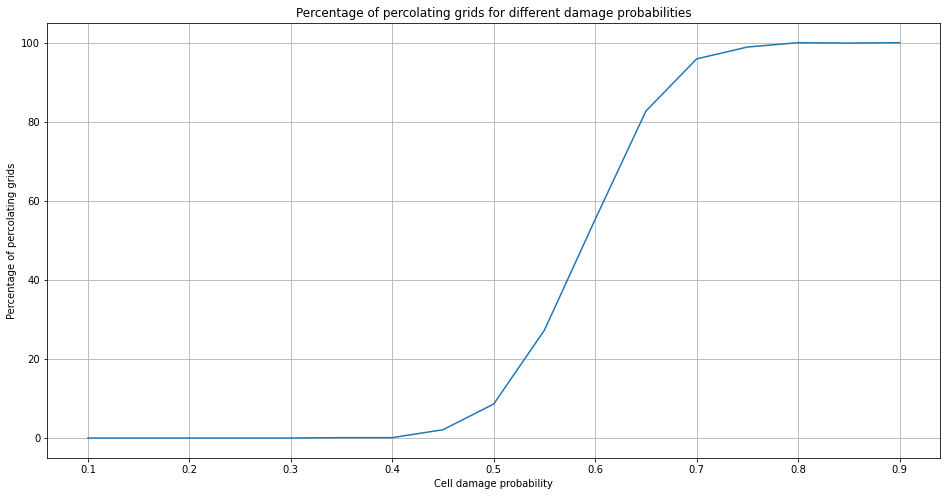

In [7]:
plt.figure(figsize=(16, 8))
plt.plot(probability_list, percolating_percentage_list)

plt.title("Percentage of percolating grids for different damage probabilities")
plt.ylabel("Percentage of percolating grids")
plt.xlabel("Cell damage probability")
plt.grid()

plt.show()